In [8]:
import pandas as pd
import yfinance as yf
import talib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import sqlalchemy

In [9]:
stocks_lists = [i + '.NS' for i in pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]['Symbol'].values]

In [ ]:
engine = sqlalchemy.create_engine('sqlite:///trades_db.db')

In [10]:
stocks_data = {}

for i in stocks_lists:
    
    data = yf.download(i, interval ='15m', start = datetime.datetime.now().date() - datetime.timedelta(days = 59))['Close'].to_frame()
    data['rsi'] = talib.RSI(data.Close, timeperiod=14)
    data['ret'] = np.log(data['Close']/data['Close'].shift(1))
    data.dropna(inplace = True)
    stocks_data[i] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
daily_stocks_list = []

for i in range(len(stocks_data['ADANIENT.NS'])):

    try:
    
        all_rsi = []
        
        for keys, values in stocks_data.items():
                
            if values['rsi'].iloc[i] > 50:
                    
                all_rsi.append([values.index[i], keys, values['rsi'].iloc[i]])
        
        all_rsi_df = pd.DataFrame(all_rsi, columns = ['datetime', 'stock_name', 'rsi_value'])
        all_rsi_df = all_rsi_df.sort_values(by = 'rsi_value')
        daily_stocks_list.append([values.index[i], all_rsi_df['stock_name'].values])

    except:

        pass

In [12]:
capital = 25000
trades = []

trade = False


for i in range(len(stocks_data['ADANIENT.NS'])):

    try:
    
        if trade == False:
    
            all_rsi = []
        
            for keys, values in stocks_data.items():
                    
                if values['rsi'].iloc[i] > 60:
                        
                    all_rsi.append([values.index[i], keys, values['Close'].iloc[i], values['rsi'].iloc[i]])
            
            all_rsi_df = pd.DataFrame(all_rsi, columns = ['datetime', 'stock_name', 'close', 'rsi_value'])
            all_rsi_df = all_rsi_df.sort_values(by = 'rsi_value', ascending = False)
            
            stock_name = all_rsi_df.iloc[0]['stock_name']
    
            trade = True
            
            buy_price = stocks_data[stock_name].Close.iloc[i]
            no_stocks = math.floor(capital/buy_price)
            bought_datetime = stocks_data[stock_name].index[i]    
        
        if trade == True:
    
    
            for index, rows in stocks_data[stock_name].iloc[i:].iterrows():
                
                
                if (rows['rsi']<40):
                    
                    sell_price = rows['Close']
                    profit = (sell_price-buy_price)*no_stocks*4
                    capital = capital + profit - ((capital/100000)*45)*4 + 40
                    
                    trades.append([bought_datetime, stock_name, buy_price, sell_price, no_stocks, profit, capital])
    
                    trade = False
                    break
    
                    
                else:
                    
                    break
    
    except:

        
        pass

In [13]:
trades_df = pd.DataFrame(trades)

In [33]:
if trades_df.iloc[-1][0] > pd.read_sql('trades_list', engine).iloc[-1][0]:
    
    trades_df[trades_df[0]>pd.read_sql('trades_list', engine).iloc[-1][0]].to_sql('trades_list', engine, if_exists='append', index=False)
    print('New Trades Added')
    print(trades_df[trades_df[0]>pd.read_sql('trades_list', engine).iloc[-1][0]])
    
else:
    print('No new Trades')
    

No new Trades


In [47]:
s = pd.read_sql('trades_list', engine)
s['ret'] = s['3']/s['2']
s['nav'] = s['ret'].cumprod()

In [48]:
s

,0,1,2,3,4,5,6,ret,nav
0,2023-11-08 12:45:00,TITAN.NS,3317.350098,3283.699951,7,-942.204102,24052.795898,0.989856,0.989856
1,2023-11-09 13:45:00,M&M.NS,1543.099976,1574.000000,15,1854.001465,25903.502331,1.020025,1.009678
2,2023-11-20 09:30:00,DIVISLAB.NS,3694.850098,3691.949951,7,-81.204102,25815.671925,0.999215,1.008885
3,2023-11-22 13:45:00,BAJAJ-AUTO.NS,5736.200195,6025.000000,4,4620.796875,30430.000590,1.050347,1.059680
4,2023-12-01 10:15:00,ITC.NS,447.649994,458.299988,67,2854.198364,33269.424954,1.023791,1.084890
5,2023-12-07 10:30:00,POWERGRID.NS,229.899994,228.399994,144,-864.000000,32385.539989,0.993475,1.077812
6,2023-12-08 13:30:00,TITAN.NS,3619.250000,3600.100098,8,-612.796875,31754.449142,0.994709,1.072109
7,2023-12-12 10:15:00,ULTRACEMCO.NS,9793.650391,9713.650391,3,-960.000000,30777.291133,0.991831,1.063351
8,2023-12-13 11:15:00,DRREDDY.NS,5605.000000,5568.500000,5,-730.000000,30031.892009,0.993488,1.056427
9,2023-12-14 15:00:00,M&M.NS,1704.099976,1697.949951,17,-418.201660,29599.632943,0.996391,1.052614


In [60]:
n = yf.download('^NSEI', start = s.iloc[0]['0']-datetime.timedelta(minutes = 15), end = s.iloc[-1]['0']+datetime.timedelta(minutes = 15), interval = '15m')
n['ret'] = n['Close']/n['Close'].shift(1)
n = n.dropna()
n['nav'] = n['ret'].cumprod()

[*********************100%%**********************]  1 of 1 completed


C:\Users\soham jain\AppData\Local\Temp\ipykernel_29360\4218662721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['nav'] = n['ret'].cumprod()


(array([19669., 19676., 19683., 19692., 19699., 19706., 19713., 19723.]),
 [Text(19669.0, 0, '2023-11-08'),
  Text(19676.0, 0, '2023-11-15'),
  Text(19683.0, 0, '2023-11-22'),
  Text(19692.0, 0, '2023-12-01'),
  Text(19699.0, 0, '2023-12-08'),
  Text(19706.0, 0, '2023-12-15'),
  Text(19713.0, 0, '2023-12-22'),
  Text(19723.0, 0, '2024-01-01')])

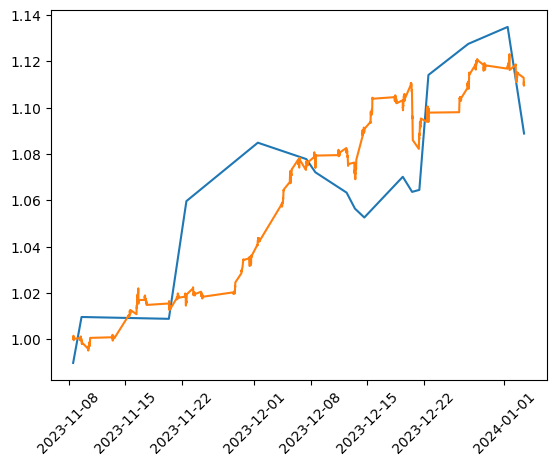

In [61]:
plt.plot(s['0'], s['nav'])
plt.plot(n['nav'])
plt.xticks(rotation = 45)